In [88]:
import pandas as pd
import numpy as np

from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [30]:
df = pd.read_csv('../data/placement_processed.csv')

In [31]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,placed,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


## Feature Engineering

In [32]:
df_modelling = df.copy()

In [33]:
df_modelling = df_modelling.drop(columns='salary')

In [34]:
df_modelling

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,placed
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,0,91.0,Mkt&Fin,74.49,1
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,0,74.0,Mkt&Fin,53.62,1
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,1,59.0,Mkt&Fin,69.72,1
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,0,70.0,Mkt&HR,60.23,1


In [35]:
df_modelling = pd.get_dummies(data=df_modelling, columns=['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation'])

In [36]:
df_modelling

,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,placed,gender_F,gender_M,ssc_b_Central,...,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,91.00,58.00,0,55.0,58.80,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
1,79.33,78.33,77.48,1,86.5,66.28,1,0,1,1,...,0,1,0,0,1,0,0,1,1,0
2,65.00,68.00,64.00,0,75.0,57.80,1,0,1,1,...,1,0,1,0,0,1,0,0,1,0
3,56.00,52.00,52.00,0,66.0,59.43,0,0,1,1,...,1,0,0,0,1,0,0,1,0,1
4,85.80,73.60,73.30,0,96.8,55.50,1,0,1,1,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,0,91.0,74.49,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
211,58.00,60.00,72.00,0,74.0,53.62,1,0,1,0,...,0,1,0,0,1,0,0,1,1,0
212,67.00,67.00,73.00,1,59.0,69.72,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
213,74.00,66.00,58.00,0,70.0,60.23,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1


In [37]:
df_modelling.dtypes

ssc_p                     float64
hsc_p                     float64
degree_p                  float64
workex                      int64
etest_p                   float64
mba_p                     float64
placed                      int64
gender_F                    uint8
gender_M                    uint8
ssc_b_Central               uint8
ssc_b_Others                uint8
hsc_b_Central               uint8
hsc_b_Others                uint8
hsc_s_Arts                  uint8
hsc_s_Commerce              uint8
hsc_s_Science               uint8
degree_t_Comm&Mgmt          uint8
degree_t_Others             uint8
degree_t_Sci&Tech           uint8
specialisation_Mkt&Fin      uint8
specialisation_Mkt&HR       uint8
dtype: object

In [38]:
df_modelling.isnull().sum()

ssc_p                     0
hsc_p                     0
degree_p                  0
workex                    0
etest_p                   0
mba_p                     0
placed                    0
gender_F                  0
gender_M                  0
ssc_b_Central             0
ssc_b_Others              0
hsc_b_Central             0
hsc_b_Others              0
hsc_s_Arts                0
hsc_s_Commerce            0
hsc_s_Science             0
degree_t_Comm&Mgmt        0
degree_t_Others           0
degree_t_Sci&Tech         0
specialisation_Mkt&Fin    0
specialisation_Mkt&HR     0
dtype: int64

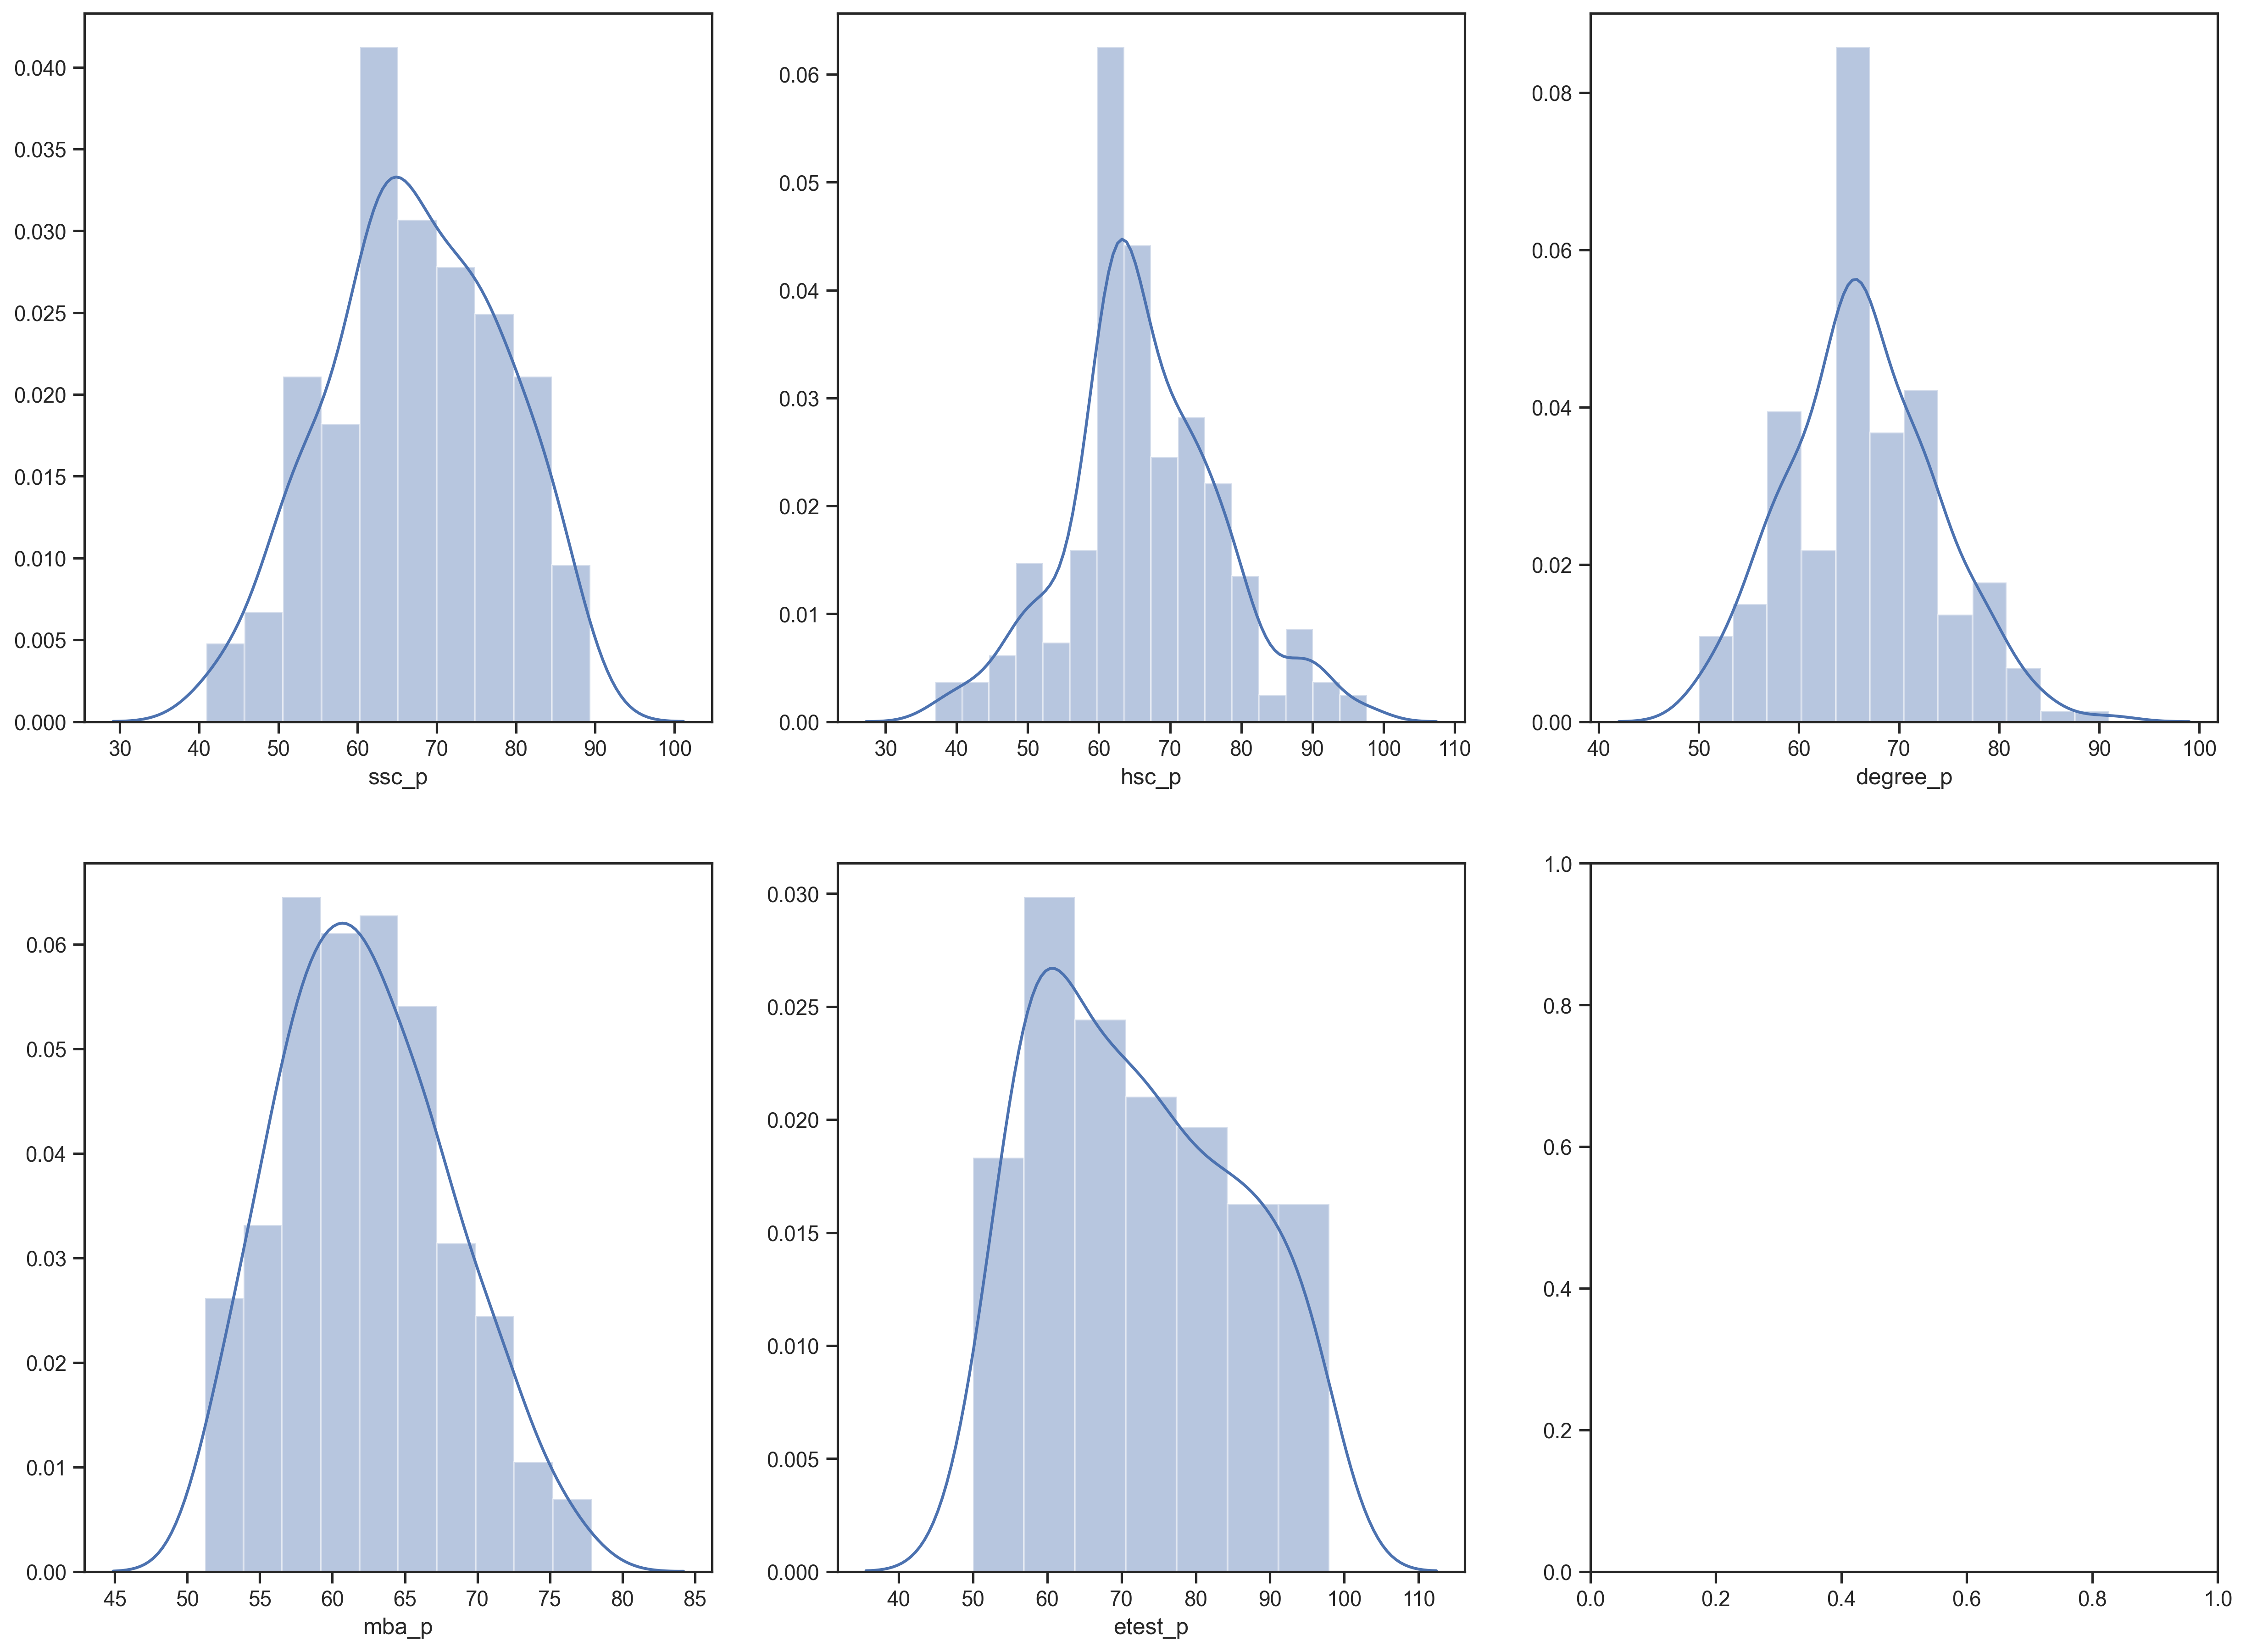

In [39]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15), dpi=300)
sns.distplot(df_modelling['ssc_p'], ax=ax[0,0])
sns.distplot(df_modelling['hsc_p'], ax=ax[0,1])
sns.distplot(df_modelling['degree_p'], ax=ax[0,2])
sns.distplot(df_modelling['mba_p'], ax=ax[1,0])
sns.distplot(df_modelling['etest_p'], ax=ax[1,1])

## Train-Test Split

In [40]:
print("Total students      = {:}".format(len(df_modelling)))
print("Students Placed     = {:} ({:.2%})".format(df_modelling['placed'].sum(), df_modelling['placed'].sum()/len(df_modelling)))
print("Students not Placed = {:} ({:.2%})".format(sum(df_modelling['placed']==0), sum(df_modelling['placed']==0)/len(df_modelling)))

Total students      = 215
Students Placed     = 148 (68.84%)
Students not Placed = 67 (31.16%)


In [69]:
percentage = [10, 15, 20]

for i in percentage:
    
    print('---------------------------')
    print('\nA {}/{}/{} split would mean:\n'.format(100-(2*i), i, i))
    print('{:f} train observations'.format(round(len(df_modelling)*(100-(2*i))/100)))
    print('{:f} validation observations'.format(round(len(df_modelling)*i/100)))
    print('{:f} test observations\n'.format(round(len(df_modelling)*i/100)))

---------------------------

A 80/10/10 split would mean:

172.000000 train observations
22.000000 validation observations
22.000000 test observations

---------------------------

A 70/15/15 split would mean:

150.000000 train observations
32.000000 validation observations
32.000000 test observations

---------------------------

A 60/20/20 split would mean:

129.000000 train observations
43.000000 validation observations
43.000000 test observations



In [42]:
y = df_modelling['placed']
X = df_modelling.drop(columns=['placed'])

In [70]:
X_train_initial, X_test, y_train_initial, y_test = train_test_split(X, y,
                                                   test_size = 32,
                                                   stratify = df_modelling['placed'])

In [81]:
X_train, X_val, y_train, y_val = train_test_split(X_train_initial, y_train_initial,
                                                   test_size = 32,
                                                 random_state=42)

In [84]:
print("No. of observations:\n")
print("{} train observations".format(len(X_train)))
print("{} validation observations".format(len(X_val)))
print("{} test observations".format(len(X_test)))

No. of observations:

151 train observations
32 validation observations
32 test observations


## Pipelines

- Logistic Regression
- SGDClassifier
- LogisticRegression
- DecisionTreeClassifier
- KNeighborsClassifier
- RandomForestClassifier
- SVC

In [49]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))])

In [50]:
pipeline_sgdc = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss='log'))])

In [51]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())])

In [52]:
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))])

In [53]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))])

In [54]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())])

In [85]:
start = timer()

pipe = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(max_iter=1000))])

grid_param = [
                {'classifier': [LogisticRegression(max_iter=1000)],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)
                },
                {'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(0, 4, 10),
                 'classifier__solver':['newton-cg','saga','sag','liblinear']
                },
                {'classifier': [LogisticRegression()],
                 'classifier__penalty': ['elasticnet'],
                 'classifier__C': np.logspace(0, 4, 10),
                 'classifier__solver':['saga']
                },
                {'classifier': [SGDClassifier()],
                 'classifier__loss': ['log', 'modified_huber'],
                 'classifier__penalty': ['l2', 'l1', 'elasticnet'],
                 'classifier__alpha': np.logspace(0.0001, 1, 5)                
                },
                {'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors': [3, 5, 10, 15]
                },
                {'classifier': [DecisionTreeClassifier(random_state=42)],
                 'classifier__max_features': ['auto', None]
                },
                {'classifier': [RandomForestClassifier(random_state=42)],
                 'classifier__n_estimators': [10, 100, 500],
                 'classifier__max_depth': [5,10,15,25,30,None],
                 'classifier__min_samples_leaf': [1,2,5,10,20],
                 'classifier__max_leaf_nodes': [2,5,10]
                }]

gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1)
best_model = gridsearch.fit(X_train,y_train)

end = timer()

print("Grid Search took {} seconds".format(end-start))

Grid Search took 289.97137517399824 seconds


In [87]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SGDClassifier(alpha=1.0002302850208247, average=False,
                               class_weight=None, early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                               loss='modified_huber', max_iter=1000,
                               n_iter_no_change=5, n_jobs=None, penalty='l2',
                               power_t=0.5, random_state=None, shuffle=True,
                               tol=0.001, validation_fraction=0.1, verbose=0,
                               warm_start=False))],
         verbose=False)
The mean accuracy of the model is: 0.875


In [94]:
pipeline_best = Pipeline([
                    ('scaler', StandardScaler()),
                    ('classifier', SGDClassifier(alpha=1,
                                                 loss='modified_huber',
                                                 penalty='l2'))])


pipeline_best.fit(X_train, y_train)

train_prob = pipeline_best.predict_proba(X_train)[:,1]
val_prob = pipeline_best.predict_proba(X_val)[:,1]
train_auc = roc_auc_score(y_train, train_prob)
val_auc = roc_auc_score(y_val, val_prob)
    
print("Train AUC = {}".format(train_auc))
print("Validation AUC = {}".format(val_auc))

Train AUC = 0.9573498964803313
Validation AUC = 0.9567099567099567


In [95]:
fpr, tpr, threshold = metrics.roc_curve(y_val, val_prob)
roc_auc = metrics.auc(fpr, tpr)

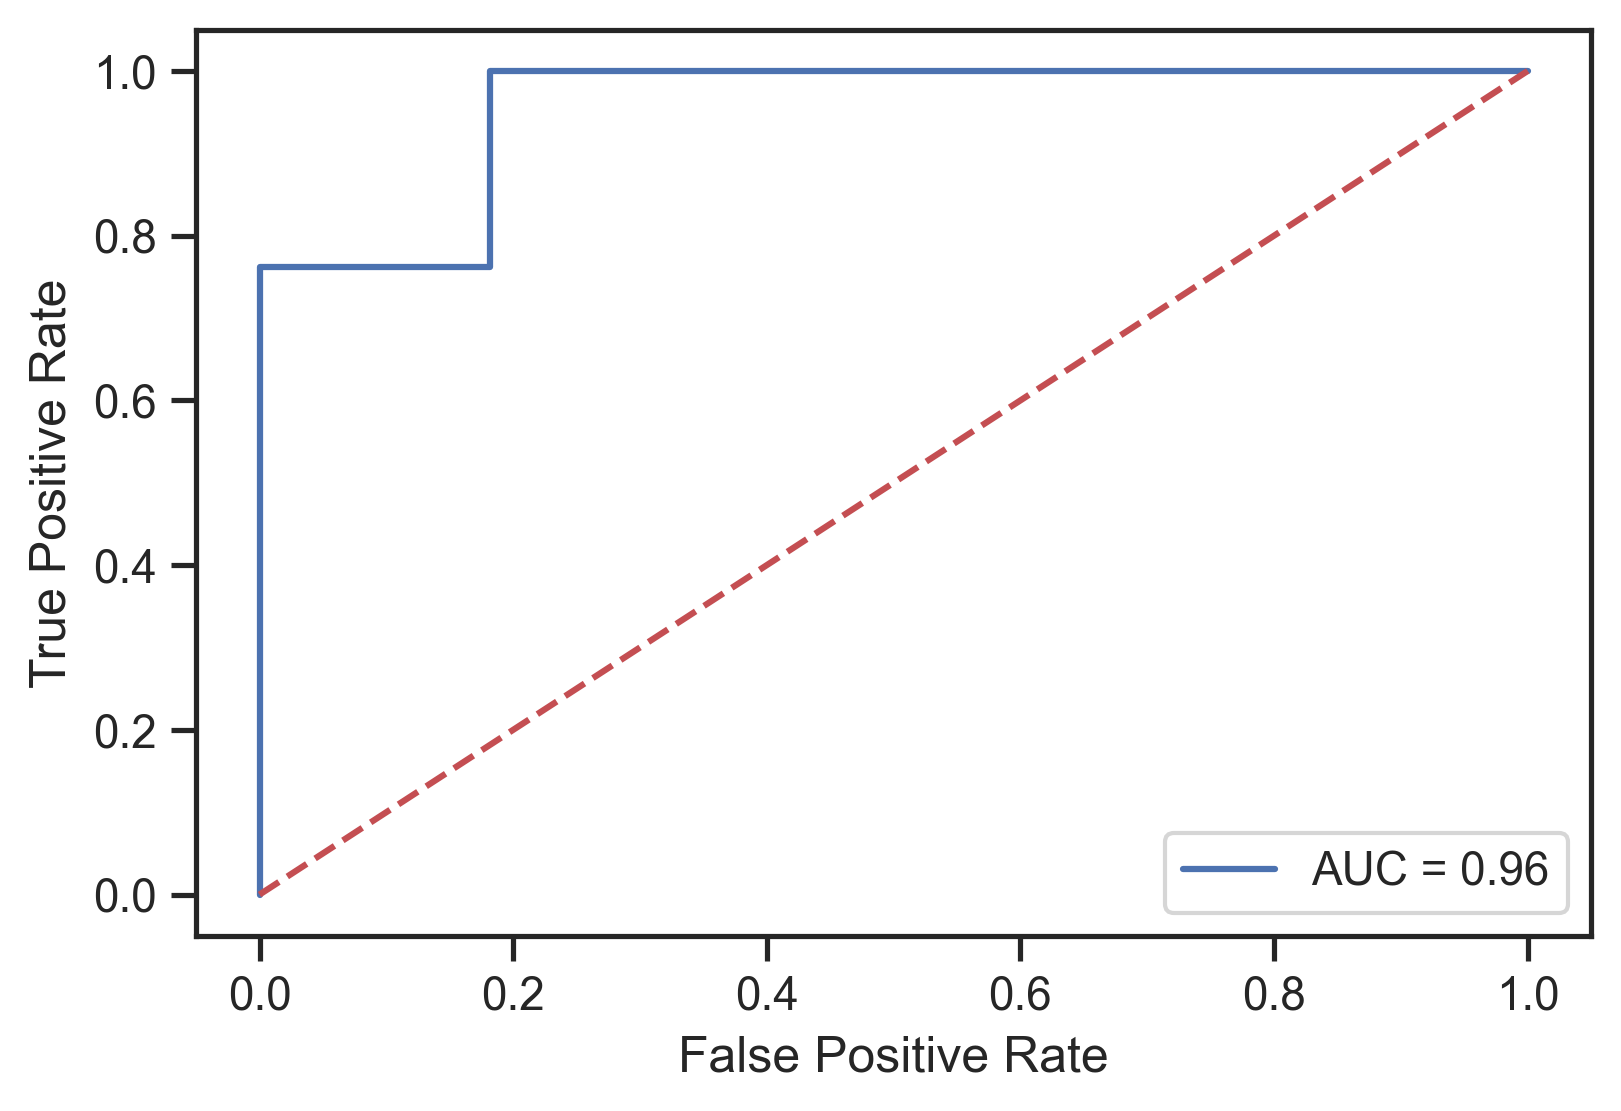

In [100]:
plt.figure(dpi=300)
plt.plot(fpr, tpr, 'b', label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

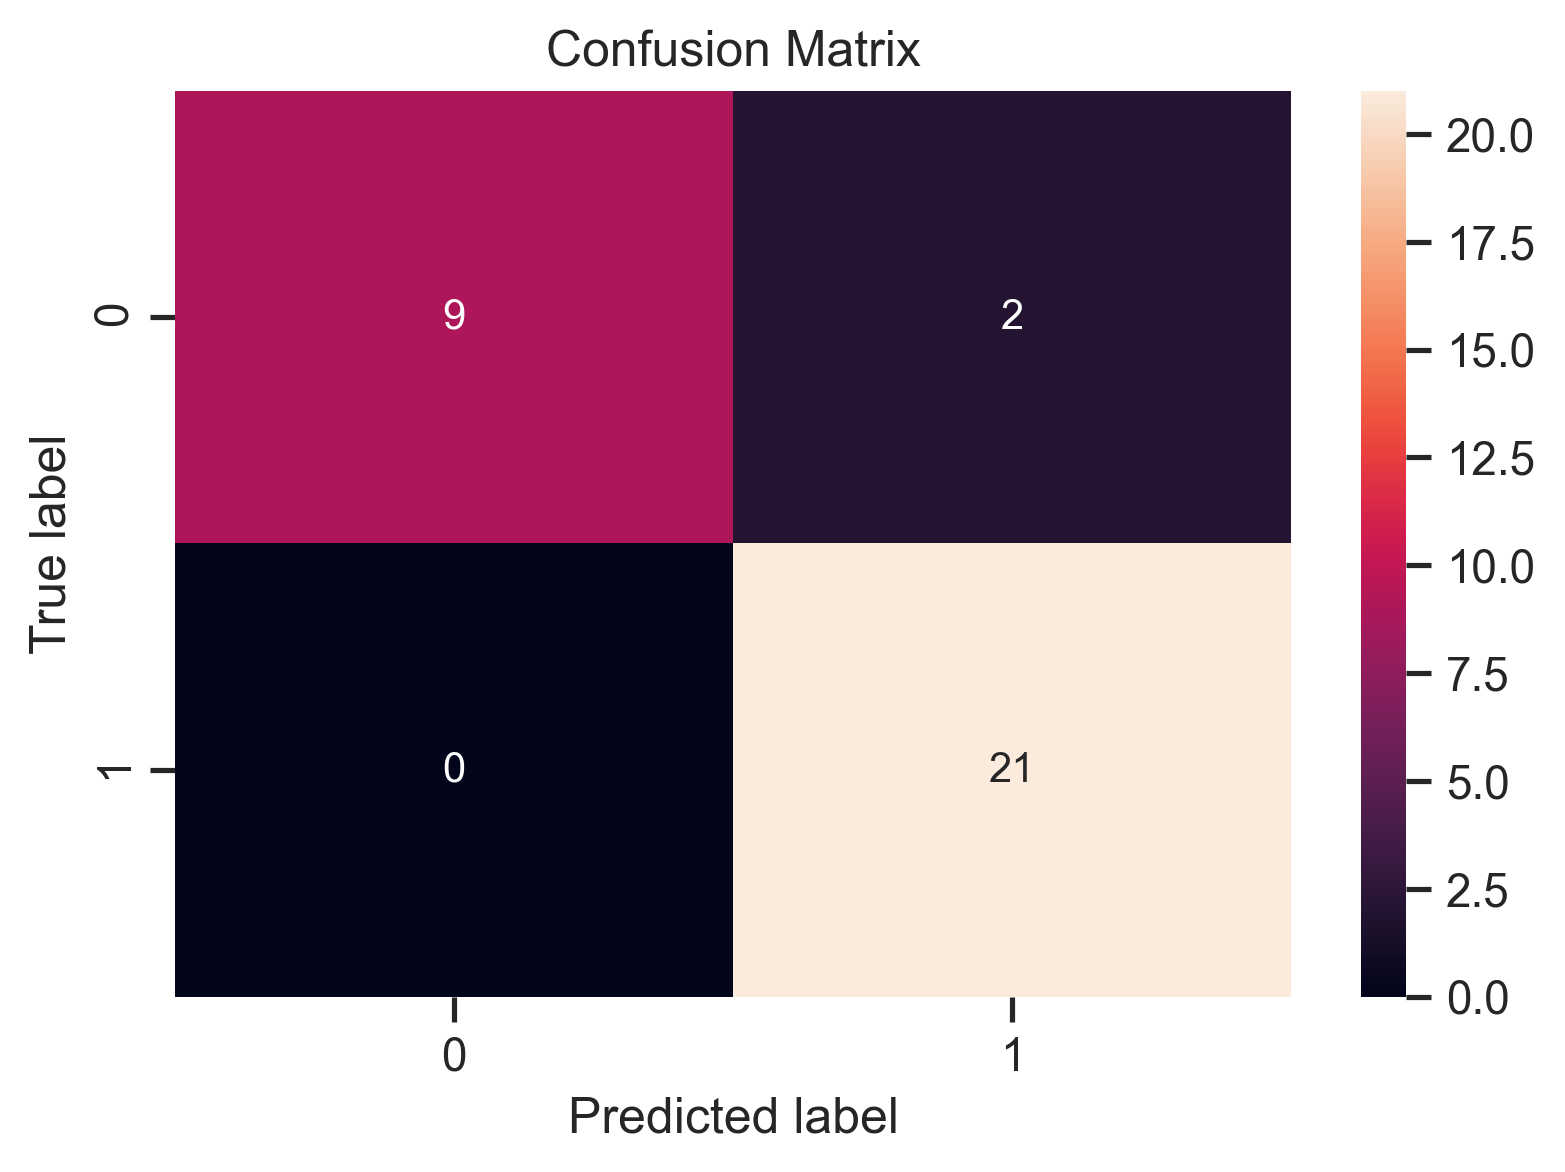

In [108]:
y_val_pred = pipeline_best.predict(X_val)
cnf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(dpi=300)
sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

### Testing on the holdout set

In [110]:
test_prob = pipeline_best.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test, test_prob)
    
print("Validation AUC = {}".format(test_auc))

Validation AUC = 0.9227272727272727


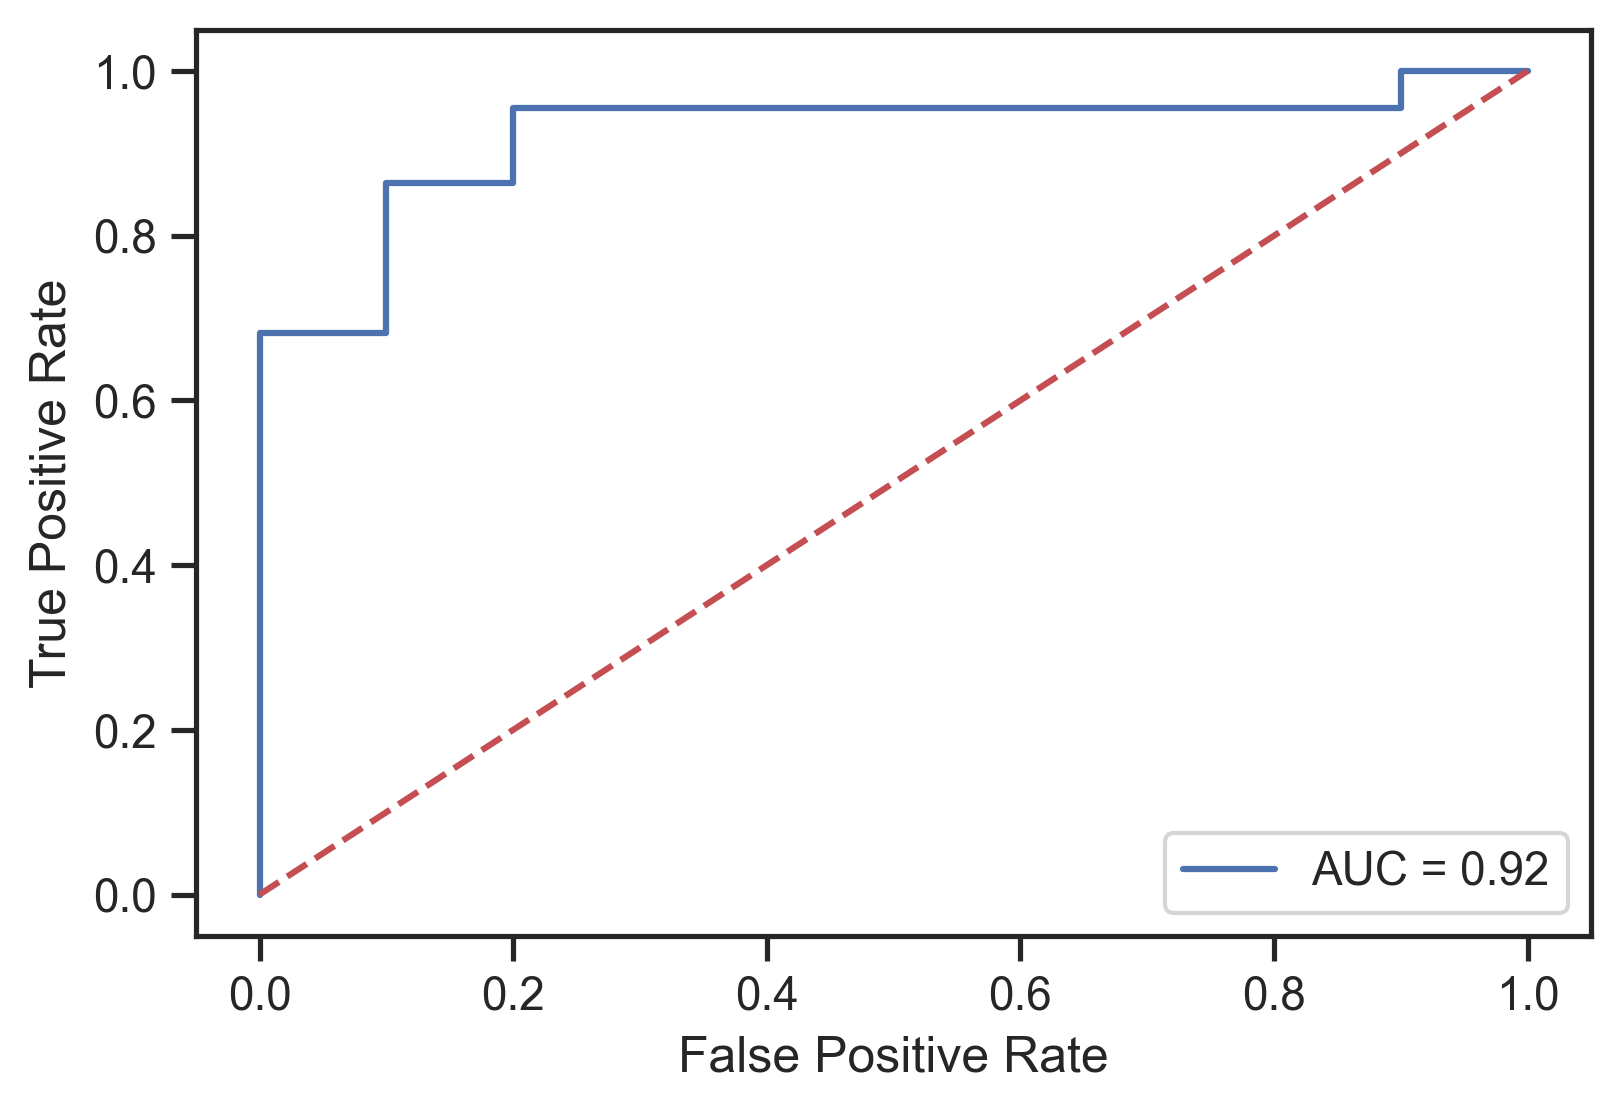

In [111]:
fpr, tpr, threshold = metrics.roc_curve(y_test, test_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(dpi=300)
plt.plot(fpr, tpr, 'b', label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

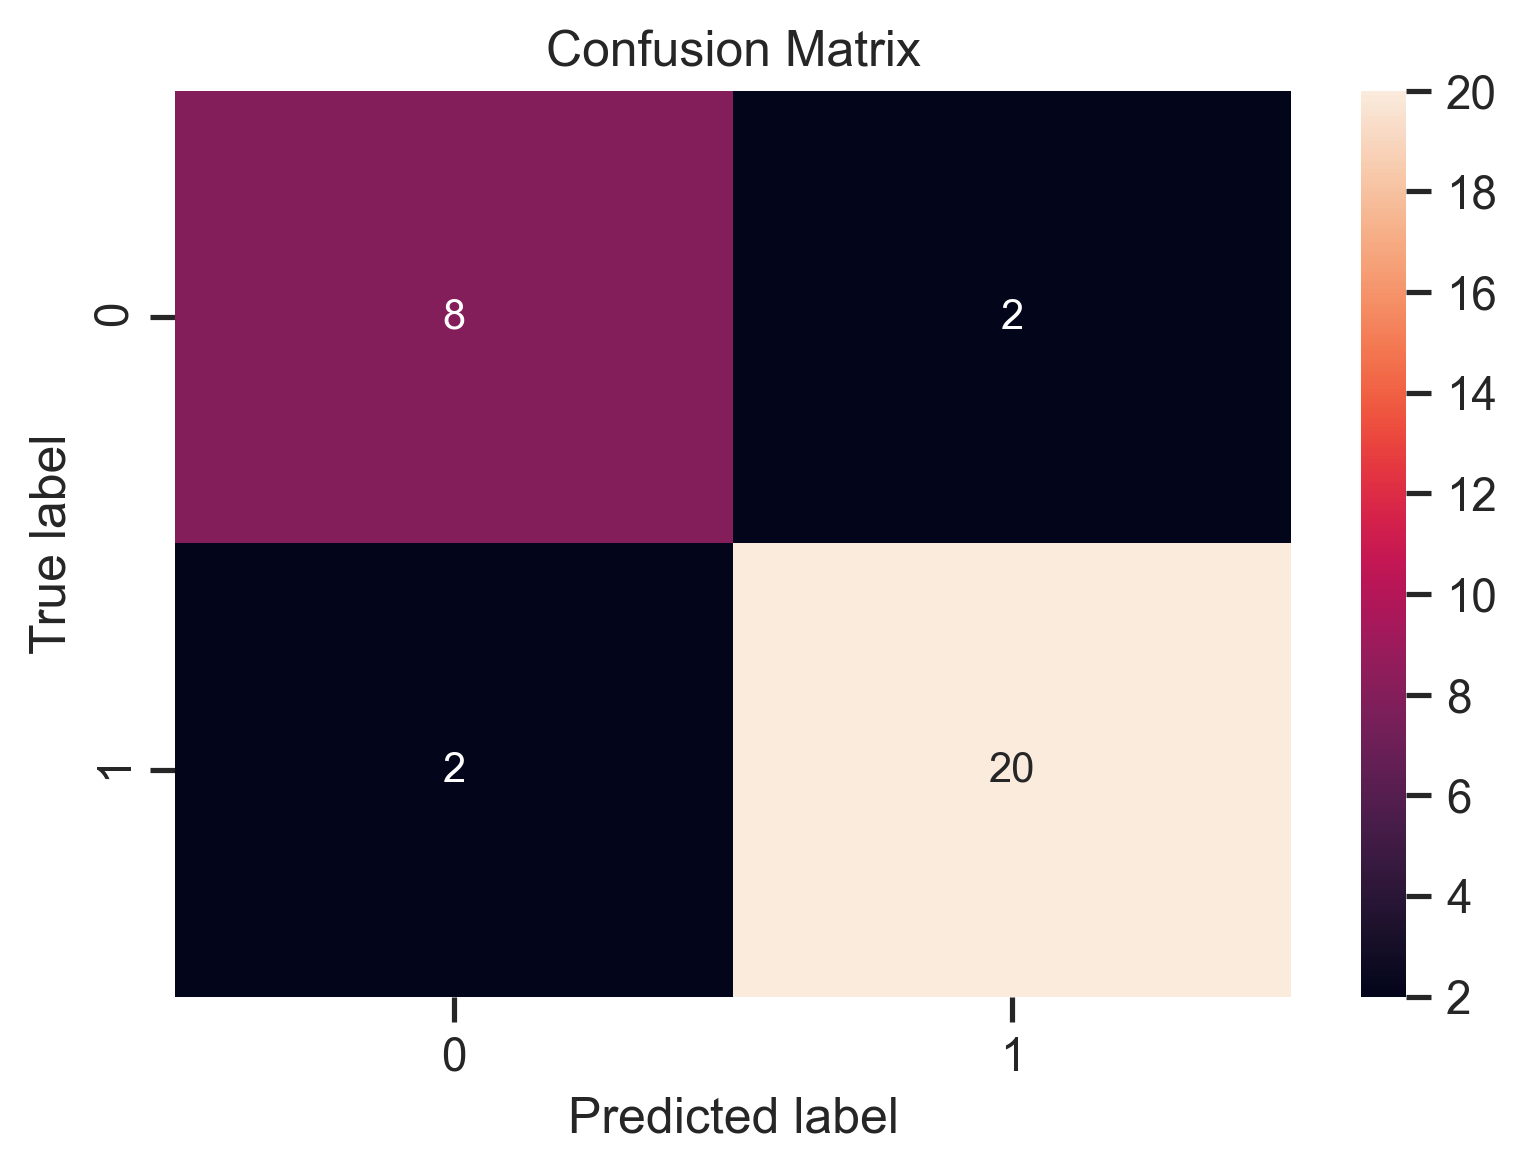

In [112]:
y_test_pred = pipeline_best.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(dpi=300)
sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [115]:
best_model = SGDClassifier(alpha=1,
                            loss='modified_huber',
                            penalty='l2')

In [116]:
feature_importance = pd.DataFrame(best_model.feature_importances_)

AttributeError: 'SGDClassifier' object has no attribute 'feature_importances_'